In [83]:
#%%writefile PIT.py
import math
import meep as mp
from meep import mpb
num_bands = 15

ax = math.sqrt(3)
ay = 1.0
nx = 3
ny = 5
geometry = [mp.Cylinder(0.2, material=mp.Medium(epsilon=12)),
            mp.Cylinder(center=mp.Vector3(ax/2.0,ay/2.0),radius=0.2, material=mp.Medium(epsilon=12))]
geometry_lattice = mp.Lattice(size=mp.Vector3(nx*ax, ny*ay))
geometry = mp.geometric_objects_lattice_duplicates(geometry_lattice, geometry,ax,ay,1)
#geometry.append(mp.Cylinder(center=mp.Vector3(0.2,0.2),radius=0.2,material=mp.Medium(epsilon=12)))
resolution = 20

# k_points = [mp.Vector3(),               # Gamma
#             mp.Vector3(y=0.5),          # M
#             mp.Vector3(-1 / 3, 1 / 3),  # K
#             mp.Vector3()]               # Gamma
# k_points = mp.interpolate(4, k_points)
# ms = mpb.ModeSolver(num_bands=num_bands,
#                     k_points=k_points,
#                     geometry=geometry,
#                     geometry_lattice=geometry_lattice,
#                     resolution=resolution)
# ms.run_tm()
# ms.output_epsilon()
#!h5tovtk epsilon.h5
dpml = 0.5
pad = 1.0
cell = mp.Vector3(nx*ax+2*(dpml+pad),ny*ay+2*(dpml+pad),0) 

Th = 2000
pml_layers = [mp.PML(dpml)]
pos = mp.Vector3(0.3,0.3)

fcen = 0.35
df = 0.6
sources = [mp.Source(src=mp.GaussianSource(fcen, fwidth=df), component=mp.Ez, center=pos)]
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry, #eps_averaging=False,
                    boundary_layers=pml_layers,
                    sources=sources,
                    resolution=resolution)
sim.run(mp.dft_ldos(fcen, df, 100), until_after_sources=Th)

-----------
Initializing structure...
Meep progress: 552.025/2016.66666603 = 27.4% done in 4.0s, 10.6s to go
Meep progress: 1116.5/2016.66666603 = 55.4% done in 8.0s, 6.5s to go
Meep progress: 1682.15/2016.66666603 = 83.4% done in 12.0s, 2.4s to go
ldos0:, 0.05, 0.0459786171605
ldos0:, 0.0560606060606, 0.0461637094746
ldos0:, 0.0621212121212, 0.0487737164276
ldos0:, 0.0681818181818, 0.0518998246889
ldos0:, 0.0742424242424, 0.0545745579859
ldos0:, 0.080303030303, 0.0577861220446
ldos0:, 0.0863636363636, 0.0633791667642
ldos0:, 0.0924242424242, 0.0727242808822
ldos0:, 0.0984848484848, 0.0861932575682
ldos0:, 0.104545454545, 0.10211993993
ldos0:, 0.110606060606, 0.116100469761
ldos0:, 0.116666666667, 0.126351268484
ldos0:, 0.122727272727, 0.135666734058
ldos0:, 0.128787878788, 0.142489109066
ldos0:, 0.134848484848, 0.144061244186
ldos0:, 0.140909090909, 0.143094874606
ldos0:, 0.14696969697, 0.145738937297
ldos0:, 0.15303030303, 0.153797570154
ldos0:, 0.159090909091, 0.160055110115
ldos0:,

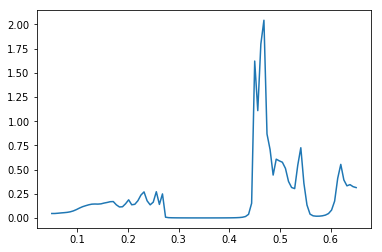

In [84]:
import numpy as np
import matplotlib.pyplot as plt
freqs = np.linspace(0.05,0.65,100)
plt.plot(freqs,sim.ldos_data)

In [37]:
#!export PYTHONPATH=/usr/local/lib/python2.7/site-packages/
!rm PI.dat
!python PIT.py >& PI.out
!rm *.h5
!rm *.vtk
!python PIT.py 
!h5tovtk PIT-epsilon.h5

rm: PI.dat: No such file or directory
Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 100 x 100 x 2.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (5, 0, 0)
     (0, 5, 0)
     (0, 0, 0.1)
Cell volume = 2.5
Reciprocal lattice vectors (/ 2 pi):
     (0.2, -0, 0)
     (-0, 0.2, -0)
     (0, -0, 10)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.2, height 0.1, axis (0, 0, 1)
Geometric object tree has depth 1 and 3 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: zodd.
Initializing fields to random numbers...
16 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.1, 0.0>
  Vector3<0.0, 0.2, 0.0>
  Vector3<0.0, 0.3, 0.0>
  Vector3<0.0, 0.4, 0.0>
  Vector3<0.0, 0.5, 0.0>
  Vector3<-0.2, 0.4, 0.0>
  Vector3<-0.4, 0.3, 0.0>
  Vector3<-0.6, 0.2, 0.0>
  Vector3<-0.8, 0.1, 0.0>
  Vector3<-1.0, 0.0, 

In [32]:
!rm *.dat
!grep tmfreqs PI.out >> PI.dat

rm: *.dat: No such file or directory


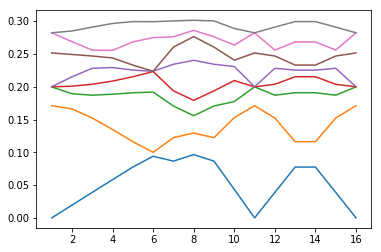

In [33]:
%matplotlib inline
import csv
import numpy as np
import matplotlib.pyplot as plt
num_bands=8
nip_raw = []
k_raw = []
omega_raw = []

with open('PI.dat') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_file)
    for row in csv_reader:
        nip_raw.append(row[1])
        k_raw.append(row[2:5])
        omega_raw.append(row[6:num_bands+6])

N=np.size(nip_raw)
nip=np.zeros((N))
k=np.zeros((N,3))
omega=np.zeros((N,num_bands))
for i in range(0,N):
    nip[i] = float(nip_raw[i])
    for j in range(0,3):
        k[i][j] = float(k_raw[i][j])
        
    for j in range(0,num_bands):
        omega[i][j] = float(omega_raw[i][j])

plt.plot(nip,omega[:,:])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(1,2)
plt.show()


In [ ]:
!pip install -U matplotlib